In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.DataFrame(
 
    {
        'hours_spent': [20,10,9,6,0,3,17,12,10],
        'points_exam': [15,12,8,5,0,4,13,14,11]
    }
)

df.head()

,hours_spent,points_exam
0,20,15
1,10,12
2,9,8
3,6,5
4,0,0


In [3]:
features = df.drop(['points_exam'], axis=1)
target = df['points_exam']

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8)

In [4]:
stdscaler = StandardScaler()
X_train_std = stdscaler.fit_transform(X_train)
X_test_std = stdscaler.transform(X_test)

In [5]:
lr = LinearRegression()
lr.fit(X_train_std, y_train)

LinearRegression()

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

prediction_on_test = lr.predict(X_test_std)
print('MSE:', mean_squared_error(y_test, prediction_on_test))
print('MAE:', mean_absolute_error(y_test, prediction_on_test))
print('R2-Score:', r2_score(y_test, prediction_on_test))

MSE: 2.344812433250267
MAE: 1.5235849056603774
R2-Score: 0.7394652851944148


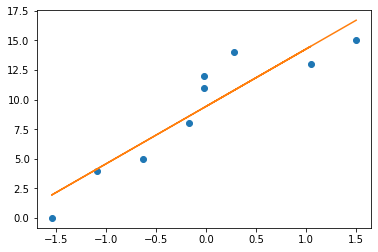

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(stdscaler.transform(features), target, 'o')

m, b = np.polyfit(X_train_std.flatten(), y_train, 1)

plt.plot(stdscaler.transform(features), m*stdscaler.transform(features) + b)